In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_train=pd.read_csv('mnist_train.csv')
df_test=pd.read_csv('mnist_test.csv')
df_train=df_train.to_numpy()
df_test=df_test.to_numpy()
X=df_train[:,1:]
y=df_train[:,0]
X=X/255
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)
X_test=df_test[:,1:]
y_test=df_test[:,0]


# Grid search on max depth of estimators:

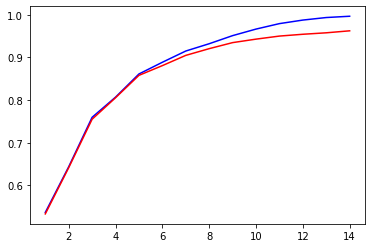

In [7]:
train_acc = []
val_acc = []

for n in range(1, 15):
    clf = RandomForestClassifier(n_estimators=70, max_depth=n, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))
    
plt.plot(range(1, 15), train_acc, 'b-')
plt.plot(range(1, 15), val_acc, 'r-')

# Grid search on number of estimators:

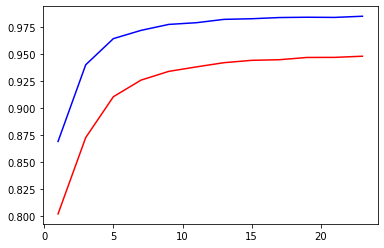

In [9]:
train_acc = []
val_acc = []

for n in range(1, 25,2):
    clf = RandomForestClassifier(n_estimators=n, max_depth=12, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))
    
plt.plot(range(1, 25,2), train_acc, 'b-')
plt.plot(range(1, 25,2), val_acc, 'r-')

# Obtained model:

In [11]:
clf = RandomForestClassifier(n_estimators=14, max_depth=12, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [13]:
print('train score:', clf.score(X_train, y_train))
print('validation score:', clf.score(X_val, y_val))
print('test score:', clf.score(X_test, y_test))

train score: 0.9820208333333333
validation score: 0.942
test score: 0.9341
